In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

In [44]:
# Loading the Red wine Quality Dataset
dataset = pd.read_csv('C:/Users/nashw/Documents/ML/winequality-red.csv')

In [45]:
# Check how the data is distributed
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Printing information about the data columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Ploting dataset to understand distribution of data columns

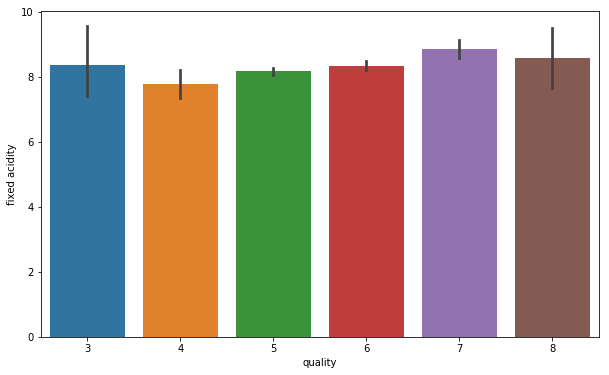

In [46]:
#Comparing quality with respect to fixed acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset)

As we can see, the fixed acidity does not give a specification about the wine quality

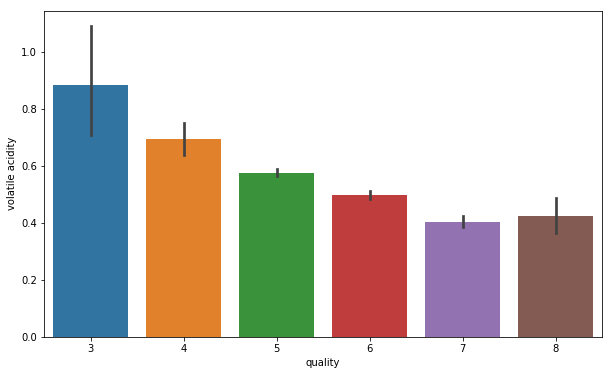

In [47]:
#Comparing quality with respect to volatile acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

It is evident from the graph, volatile acidity has a downing trend as the quality goes higher

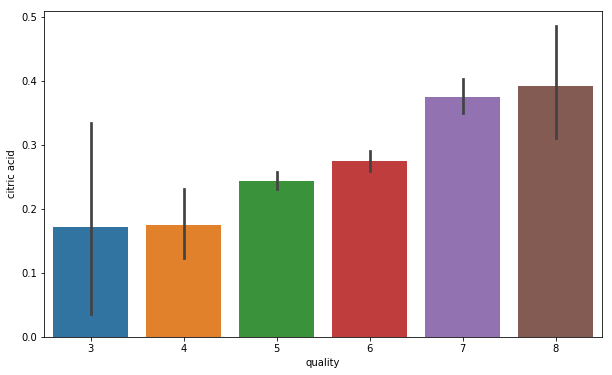

In [48]:
# Comparing quality of wine with respect to composition of citric acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset)

The composition of citric acid increases with improving quality of the wine

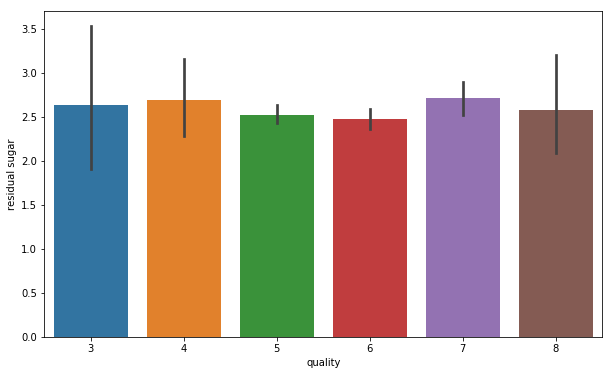

In [49]:
# Comparing quality of wine with respect to the composition of residual sugar in the wine
fig = plt.figure(figsize= (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = dataset)

The quality does not show any specific trend with regards to the change in the composition of residual sugar in the wine

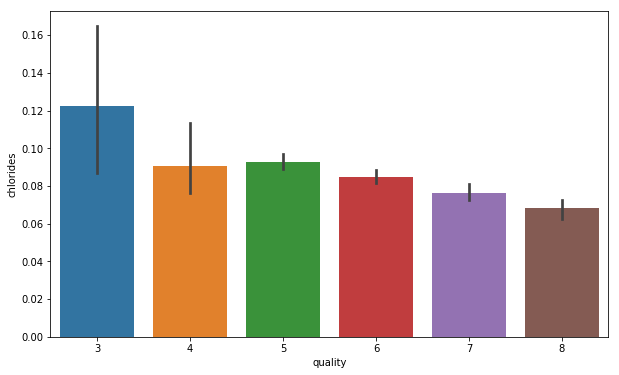

In [50]:
# Comparing quality with respect to composition of chloride
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'chlorides', data = dataset)

Composition of chloride goes down with increasing quality of wine

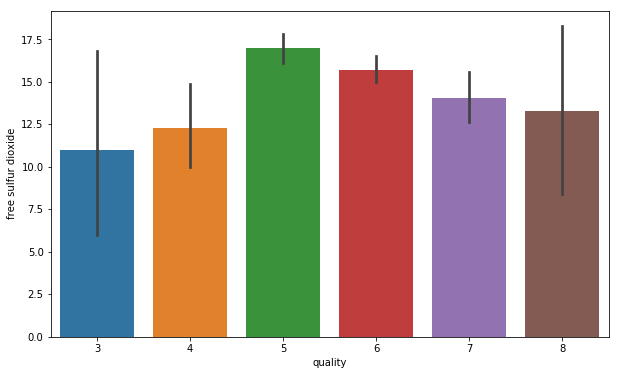

In [51]:
# Comparing quality of wine with rspect to free sulfur dioxide
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset)

The change in free sulfur dioxide state does not specify any trend of the quality of wine

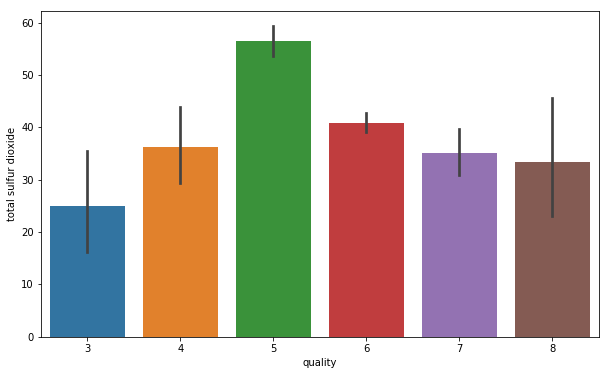

In [52]:
# Comparing the quality with respect to total sulfur dioxide in wine
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset)

The change in total sulfur dioxide in wine does not specify any trend of the wine's quality

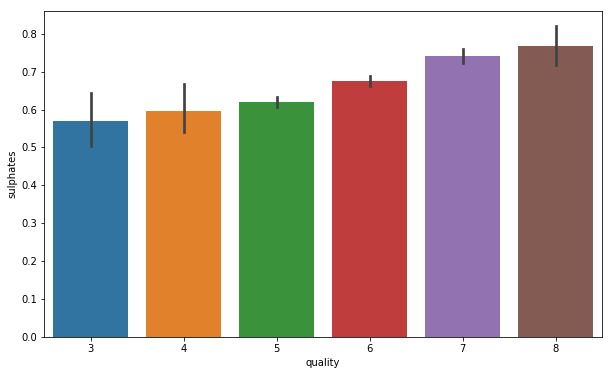

In [53]:
# Comparing quality with respect to sulphates level
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'sulphates', data = dataset)

As the level of sulphates increases the quality of wine also increases

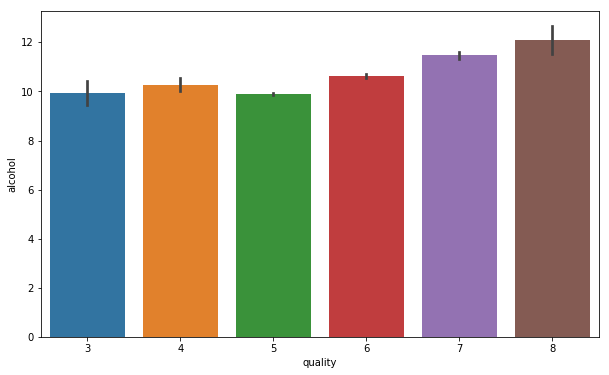

In [21]:
# Comparing quality with respect to alcohol level
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'alcohol', data = dataset)

From the graph, the quality of wine increases with increase in alcohol percentage

## Preprocessing Data to implement Machine Learning Algorithms

In [54]:
# Making binary classification for the response variable
# Classifying the wine as good or bad by defining limits on quality
bins = (2, 6.5, 8)
classifier_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = classifier_names)

In [55]:
# Assigning labels to quality variables
label_quality = LabelEncoder()

In [56]:
# Assiging bad as 0 and good as 1
dataset['quality'] = label_quality.fit_transform(dataset['quality'])

In [57]:
dataset['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

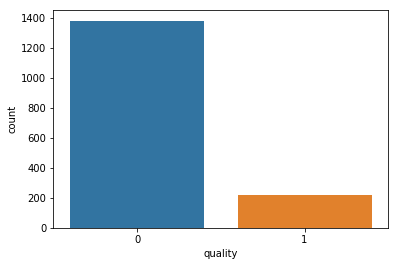

In [27]:
sns.countplot(dataset['quality'])

In [58]:
# Separating the dataset as response variabke and feature variable
x = dataset.drop('quality', axis =1)
y = dataset['quality']

In [59]:
# Splitting the dataset as training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
# Apply standard scaling to optimize results
sc = StandardScaler()

In [61]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Stochastic Gradient Descent Classifier

In [62]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(X_test)

C:\Users\nashw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [69]:
print(classification_report(Y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       273
           1       0.43      0.21      0.29        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.66      0.58      0.60       320
weighted avg       0.81      0.84      0.82       320



We obtained 84% accuracy using Stochastic Gradient Classifier

In [70]:
print(confusion_matrix(Y_test, pred_sgd))

[[260  13]
 [ 37  10]]


## Support Vector Classifier

In [71]:
svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)

In [72]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support Vector Classifier gives 86% accuracy

In [73]:
print(confusion_matrix(Y_test, pred_svc))

[[268   5]
 [ 35  12]]
